# sklearn 方式

In [119]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

model = lgb.LGBMClassifier(n_estimators=1)
model.fit(x_train, y_train)

# 获取类别
print(model.classes_)

# 获取参数
print(model.get_params())

# 获取预测值
y_pred = model.predict(x_test, num_iteration=model.best_iteration_)
print(x_test[:3],y_test[:3],y_pred[:3])

# 获取预测每个类的概率
y_pro = model.predict_proba(x_test, num_iteration=model.best_iteration_)
print(y_pro[:3])

# 获取准确率
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

[0 1 2]
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 1, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
[[5.  2.3 3.3 1. ]
 [7.4 2.8 6.1 1.9]
 [6.7 3.3 5.7 2.5]] [1 2 2] [1 2 2]
[[0.34627382 0.35338399 0.30034219]
 [0.34184173 0.28647015 0.37168811]
 [0.34184173 0.28647015 0.37168811]]
0.9111111111111111


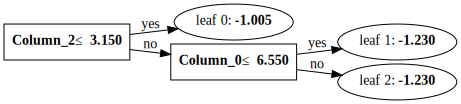

In [93]:
# 绘制决策树，画出其中的第一个
lgb.create_tree_digraph(model, tree_index=0)

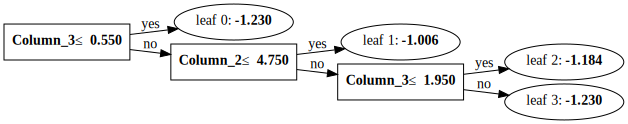

In [94]:
lgb.create_tree_digraph(model, tree_index=1)

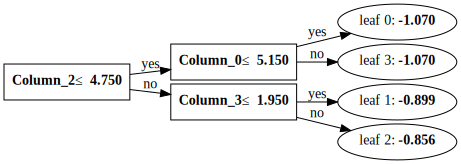

In [95]:
lgb.create_tree_digraph(model, tree_index=2)

In [108]:
# 数据测试
from math import *
#x=[-1.005,-1.23,-1.07]
x=[-1.23,-1.23,-0.856]
s=np.sum([exp(item) for item in x])
for item in x:
    print(exp(item) / s)

0.2895581997337758
0.2895581997337758
0.4208836005324485


13.997034818715369


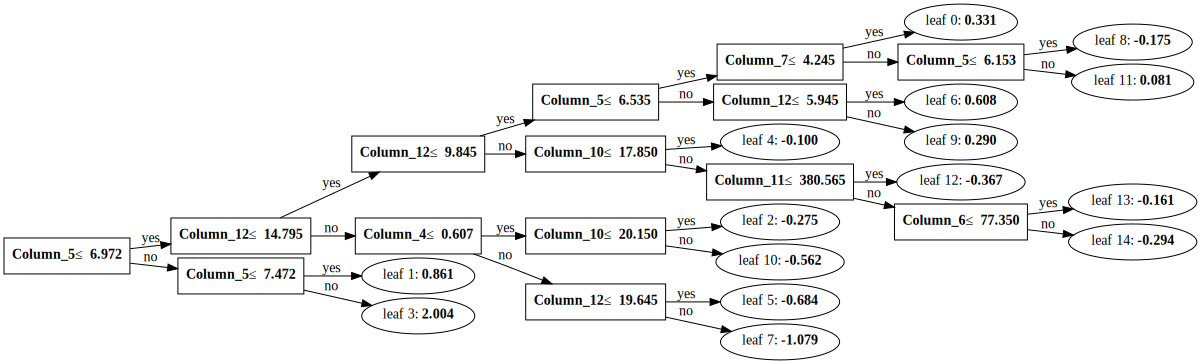

In [109]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
X,y = load_boston(return_X_y=True) # 波士顿房价
x_train, x_test, y_train, y_test = train_test_split(X, y)

model = lgb.LGBMRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test, num_iteration=model.best_iteration_)

mse = mean_squared_error(y_test,y_pred)
print(mse)

# 绘制决策树，画出其中的第一个
lgb.create_tree_digraph(model, tree_index=1)

# 原生方式

开始训练...
[10]	valid_0's auc: 1
[20]	valid_0's auc: 1
[30]	valid_0's auc: 1
[40]	valid_0's auc: 1
[50]	valid_0's auc: 1
[60]	valid_0's auc: 1
[70]	valid_0's auc: 1
[80]	valid_0's auc: 1
[90]	valid_0's auc: 1
[100]	valid_0's auc: 1
画出训练结果...


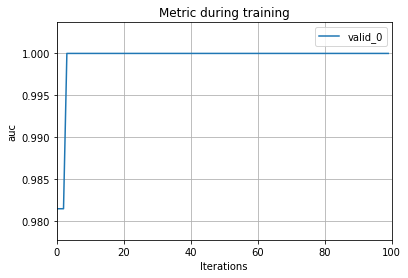

画特征重要性排序...


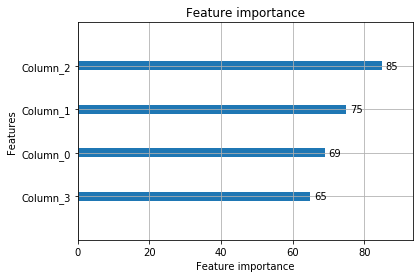

In [46]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

iris = load_iris() 
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
# 导入到lightgbm矩阵
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)


# 设置参数
params = {
    'num_leaves': 5,
    'metric': ('auc', 'logloss'),#可以设置多个评价指标
    'verbose': 0
}

evals_result = {}  #记录训练结果所用

print('开始训练...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_test,
                evals_result=evals_result,#非常重要的参数,一定要明确设置
                verbose_eval=10)

print('画出训练结果...')
ax = lgb.plot_metric(evals_result, metric='auc')#metric的值与之前的params里面的值对应
plt.show()

print('画特征重要性排序...')
ax = lgb.plot_importance(gbm, max_num_features=10)#max_features表示最多展示出前10个重要性特征，可以自行设置
plt.show()


[Text(167.4, 163.07999999999998, 'X[2] <= 2.45\nentropy = 0.666\nsamples = 105\nvalue = [0.343, 0.333, 0.324]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 36\nvalue = [0.343, 0.0, 0.0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.5\nsamples = 69\nvalue = [0.0, 0.333, 0.324]')]

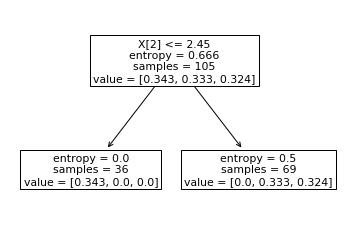